<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3º Trabalho - Processamento de Sinais Digitais

### Número do Grupo : G04
* Italo Carvalho Vianelli Ribeiro (RA: 769687)
* João Gabriel Viana Hirasawa (RA: 759055)
* Juliana Ferreira Alves (RA: 744794)"

In [3]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 4.6 MB/s 


In [4]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *

### a)

In [41]:
def conv1(x, h):
  M = len(h)
  L = len(x) 

  y = np.zeros(L + M - 1)

  for n in range(len(y)):
    soma = 0
    teto = min(n, M)
    chao = max(0, n - L + 1)
    for m in range(chao, teto + 1):
      try:
        soma += h[m] * x[n - m]
      except:
        pass
    y[n] = soma

  return y

In [42]:
# Definição dos sinais x1 e h1
x1 = [1, 2, -3, 2, 1, 1]
h1 = [1, 2, -3]

# Definição dos sinais x2 e h2
x2 = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0]
h2 = [1, 4, 10, 16, 19, 16, 10, 4, 1]

conv_x1_h1 = np.convolve(x1,h1)
conv_x2_h2 = np.convolve(x2,h2)

conv_x1_h1_nosso = conv1(x1,h1)
conv_x2_h2_nosso = conv1(x2,h2)

print(conv_x1_h1)
print(conv_x1_h1_nosso, '\n\n')
print(conv_x2_h2)
print(conv_x2_h2_nosso)

[  1   4  -2 -10  14  -3  -1  -3]
[  1.   4.  -2. -10.  14.  -3.  -1.  -3.] 


[  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]
[  0.   0.   0.   0.   1.   5.  15.  31.  49.  61.  61.  49.  30.  10.
 -10. -30. -49. -61. -61. -49. -31. -15.  -5.  -1.   0.   0.   0.   0.]


### b)

In [38]:
def geraOnda(L = 200, K = 50):
  x = np.zeros(L)
  for n in range(L):
    if n%K < K/2:
      x[n] = 1
    else:
      x[n] = 0
  return x

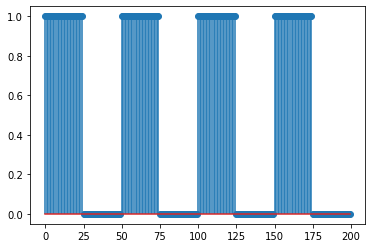

In [48]:
x = geraOnda()
stem(x, use_line_collection=True)
show()

### c)

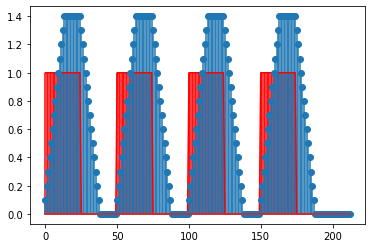

In [53]:
h = np.repeat(0.1, 14)
stem(x, use_line_collection=True, linefmt='r', markerfmt='r')
stem(conv1(x, h), use_line_collection=True)
show()


### d)

<StemContainer object of 3 artists>

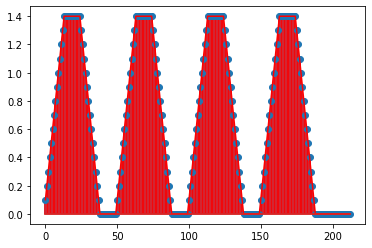

In [54]:
stem(conv1(x, h), use_line_collection=True)
stem(np.convolve(x, h), use_line_collection=True, linefmt='r', markerfmt='r')

### e)

In [59]:
def nextpow2(x):
    '''Retorna o expoente da menor potência de 2 maior do que x.'''
    return 1 if x == 0 else (x - 1).bit_length()

def conv2(x, h):
  x, h = list(x), list(h)
  nx = len(x)
  nh = len(h)
  nfft = 2**nextpow2(nx+nh-1)
  xzp = x + [0] * (nfft-nx)
  hzp = h + [0] * (nfft-nh)
  X = np.fft.fft(xzp)
  H = np.fft.fft(hzp)
  Y = X * H    # Multiplicação dos termos
  y = np.real(np.fft.ifft(Y))    # Transformada inversa de Fourier
  yt = y[:nx+nh-1]
  return yt

### f) Explicar aqui

<StemContainer object of 3 artists>

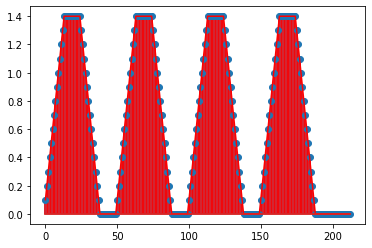

In [60]:
stem(conv2(x, h), use_line_collection=True)
stem(np.convolve(x, h), use_line_collection=True, linefmt='r', markerfmt='r')

### g)

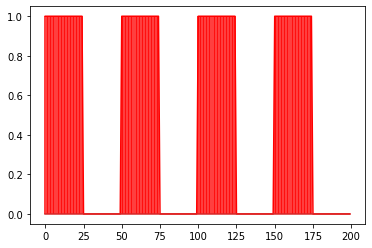

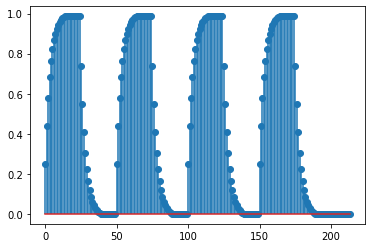

In [63]:
h = [0.25 * 0.75**n for n in range(15)]
stem(x, use_line_collection=True, linefmt='r', markerfmt='r')
show()
stem(conv1(x, h), use_line_collection=True)
show()

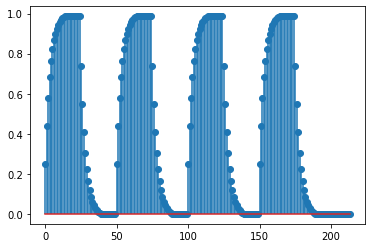

In [64]:
stem(np.convolve(x, h), use_line_collection=True)
show()

### i)

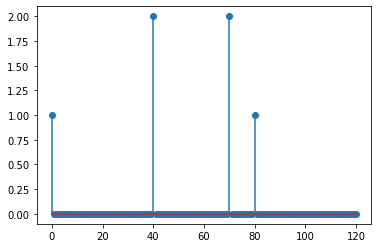

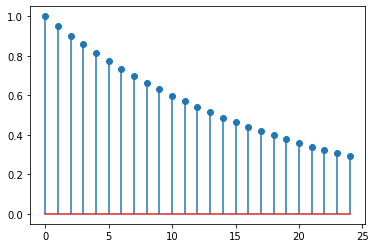

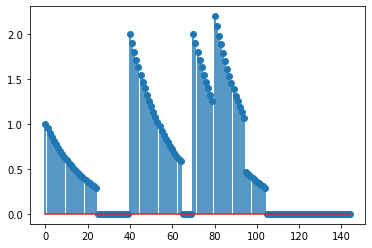

In [68]:
h = [0.95 ** n for n in range(25)]
n = np.arange(0, 120 + 1)
x = ss.dimpulse(n) + 2*ss.dimpulse(n - 40) + 2*ss.dimpulse(n - 70) + ss.dimpulse(n - 80)
stem(x, use_line_collection=True)
show()
stem(h, use_line_collection=True)
show()
stem(conv1(x, h), use_line_collection=True)
show()